<a href="https://colab.research.google.com/github/AMANDASTHE/mcom-prep-portfolio/blob/main/projects/week1-intro-eda/notebooks/01_initial_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Week 1 — Initial Exploratory Data Analysis (EDA)
### Project: Credit Risk — Default Prediction

This notebook performs a structured exploratory data analysis (EDA) on the Week 1 dataset.  
The goal is to understand data quality, variable distributions, correlations, outliers, and early risk signals.

---

## 🔍 Objectives
- Understand the dataset structure and variable types.
- Inspect missing data and potential data quality issues.
- Explore distributions of numeric and categorical variables.
- Compute correlations between features and with the target.
- Identify early trends related to credit risk.
- Produce insights to inform Week 2 (feature engineering + modelling).

---

## 📂 Dataset
File: `data/50k_dataset/credit_risk_dataset_50k.csv`  
Rows: 50,000  
Domain: Credit default prediction  
Target variable: `default`

Let’s begin.


In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [2]:
url = "https://raw.githubusercontent.com/AMANDASTHE/mcom-prep-portfolio/main/projects/week1-intro-eda/data/raw/credit_risk_dataset_50k.csv"

df = pd.read_csv(url)

df.head()



,CustomerID,Age,Income,CreditLimit,CurrentBalance,Utilisation,DelinquencyStatus,DaysPastDue,Region,EmploymentLength,CreditScore,TenureMonths,LastPaymentAmount,LastPaymentDate,WasEver60DPD
0,1,59,19836.683698,50986.253155,35087.886588,0.688183,3,102,Other,27,598.411178,101,1058.710933,2023-01-27 10:30:11,0
1,2,72,35851.242779,4318.061619,3157.630868,0.731261,3,81,Gauteng,17,592.657601,166,168.370142,2024-03-15 09:01:18,0
2,3,49,25922.242386,31455.719580,21160.175507,0.672697,0,0,Other,7,397.834314,68,1967.250509,2023-12-28 07:26:25,0
3,4,35,34319.612887,30891.788111,28524.320248,0.923363,5,25,Gauteng,8,531.200480,139,3931.987364,2023-08-20 03:53:06,0
4,5,63,49103.692491,34762.555220,24843.309915,0.714657,0,0,Gauteng,25,637.040174,34,203.924929,2022-06-04 04:17:24,0


## 📊 Dataset Snapshot

We start with an overview of the dataset structure, variable types, and completeness.


In [3]:
print("Shape:", df.shape)

print("\n--- Info ---")
df.info()

print("\n--- Summary Statistics ---")
df.describe(include='all')



Shape: (50000, 15)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         50000 non-null  int64  
 1   Age                50000 non-null  int64  
 2   Income             50000 non-null  float64
 3   CreditLimit        50000 non-null  float64
 4   CurrentBalance     50000 non-null  float64
 5   Utilisation        50000 non-null  float64
 6   DelinquencyStatus  50000 non-null  int64  
 7   DaysPastDue        50000 non-null  int64  
 8   Region             50000 non-null  object 
 9   EmploymentLength   50000 non-null  int64  
 10  CreditScore        50000 non-null  float64
 11  TenureMonths       50000 non-null  int64  
 12  LastPaymentAmount  50000 non-null  float64
 13  LastPaymentDate    50000 non-null  object 
 14  WasEver60DPD       50000 non-null  int64  
dtypes: float64(6), int64(7), object(2)
me

,CustomerID,Age,Income,CreditLimit,CurrentBalance,Utilisation,DelinquencyStatus,DaysPastDue,Region,EmploymentLength,CreditScore,TenureMonths,LastPaymentAmount,LastPaymentDate,WasEver60DPD
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,49987,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gauteng,NaN,NaN,NaN,NaN,2023-01-10 08:30:27,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20097,NaN,NaN,NaN,NaN,2,NaN
mean,25000.500000,47.539000,25192.620864,30154.915741,16586.138480,0.550213,0.966960,18.87032,NaN,14.470660,620.159951,119.791980,796.513653,NaN,0.165000
std,14433.901067,15.576555,11499.015885,14577.108649,11859.249507,0.260272,1.327322,29.58155,NaN,8.622969,79.534878,69.263675,793.137603,NaN,0.371184
min,1.000000,21.000000,5000.000000,2000.000000,201.433653,0.100010,0.000000,0.00000,NaN,0.000000,300.000000,1.000000,0.021703,NaN,0.000000
25%,12500.750000,34.000000,16883.572197,19898.017017,7125.141020,0.324312,0.000000,0.00000,NaN,7.000000,566.533646,60.000000,231.680572,NaN,0.000000
50%,25000.500000,47.000000,24944.821958,29958.463505,14091.857439,0.550057,0.000000,0.00000,NaN,14.000000,620.233267,120.000000,552.135734,NaN,0.000000
75%,37500.250000,61.000000,33057.806178,40045.317520,23683.189135,0.776085,2.000000,28.00000,NaN,22.000000,674.158524,180.000000,1101.734166,NaN,0.000000


## 🧩 Missing Values Analysis

Understanding missingness helps guide imputation and feature engineering.


In [4]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]



,0


## 🗂️ Categorical Variable Distributions

Here we inspect distributions of categorical fields to understand class balance.


In [5]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in cat_cols:
    print(f"--- {col} ---")
    display(df[col].value_counts(normalize=True).head())
    print("\n")



--- Region ---


,proportion
Region,
Gauteng,0.40194
Western Cape,0.24974
KZN,0.20036
Eastern Cape,0.09820
Other,0.04976




--- LastPaymentDate ---


,proportion
LastPaymentDate,
2023-01-10 08:30:27,0.00004
2022-05-12 12:47:34,0.00004
2023-05-26 12:09:50,0.00004
2023-09-17 11:39:03,0.00004
2024-12-19 18:12:43,0.00004


## 📈 Numeric Variable Distributions

This helps identify skewness, heavy tails, and potential outliers.


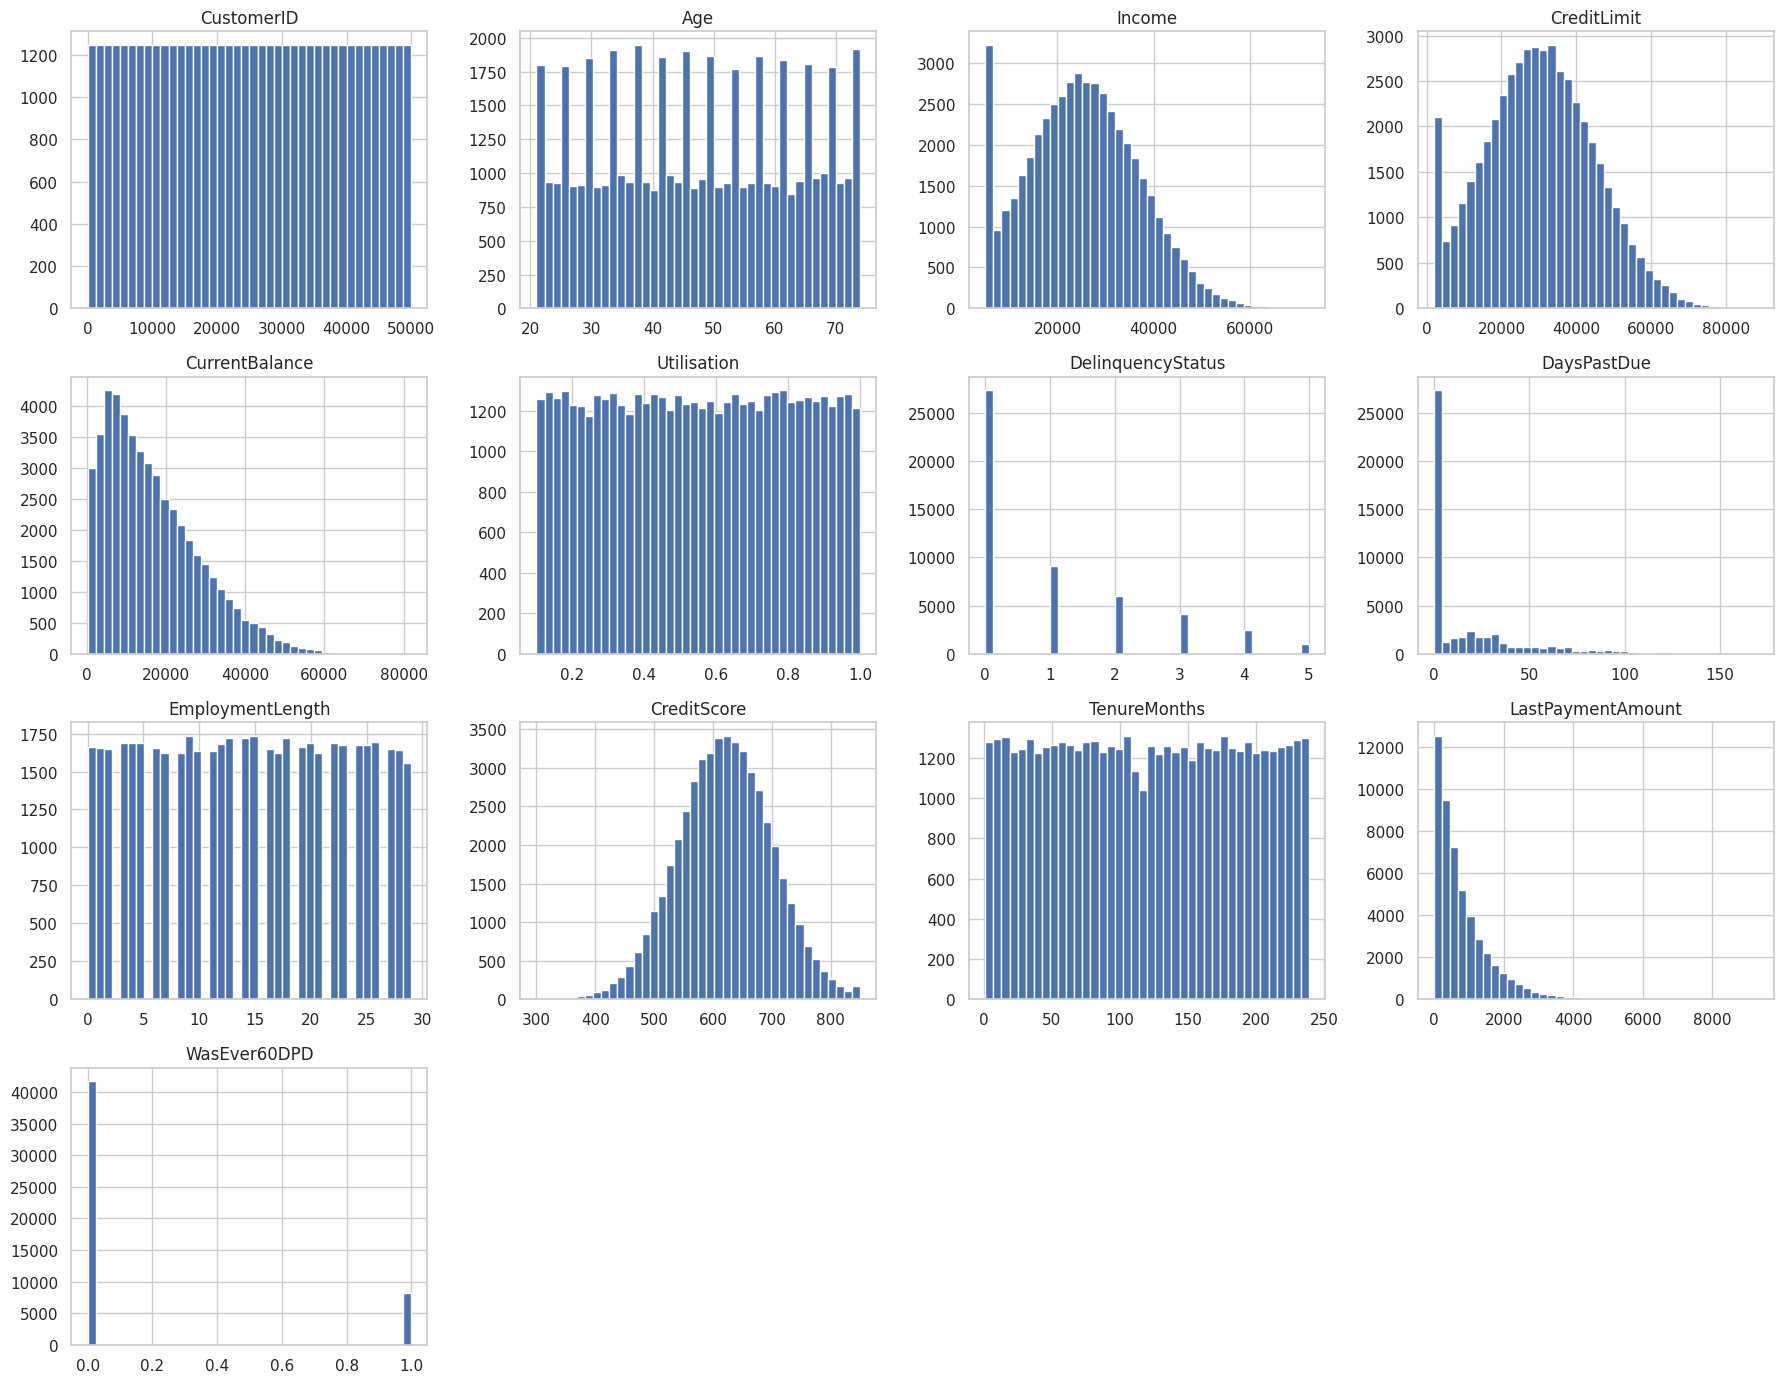

In [6]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

df[num_cols].hist(figsize=(18, 14), bins=40)
plt.tight_layout()
plt.show()



## 📦 Outlier Detection Using Boxplots


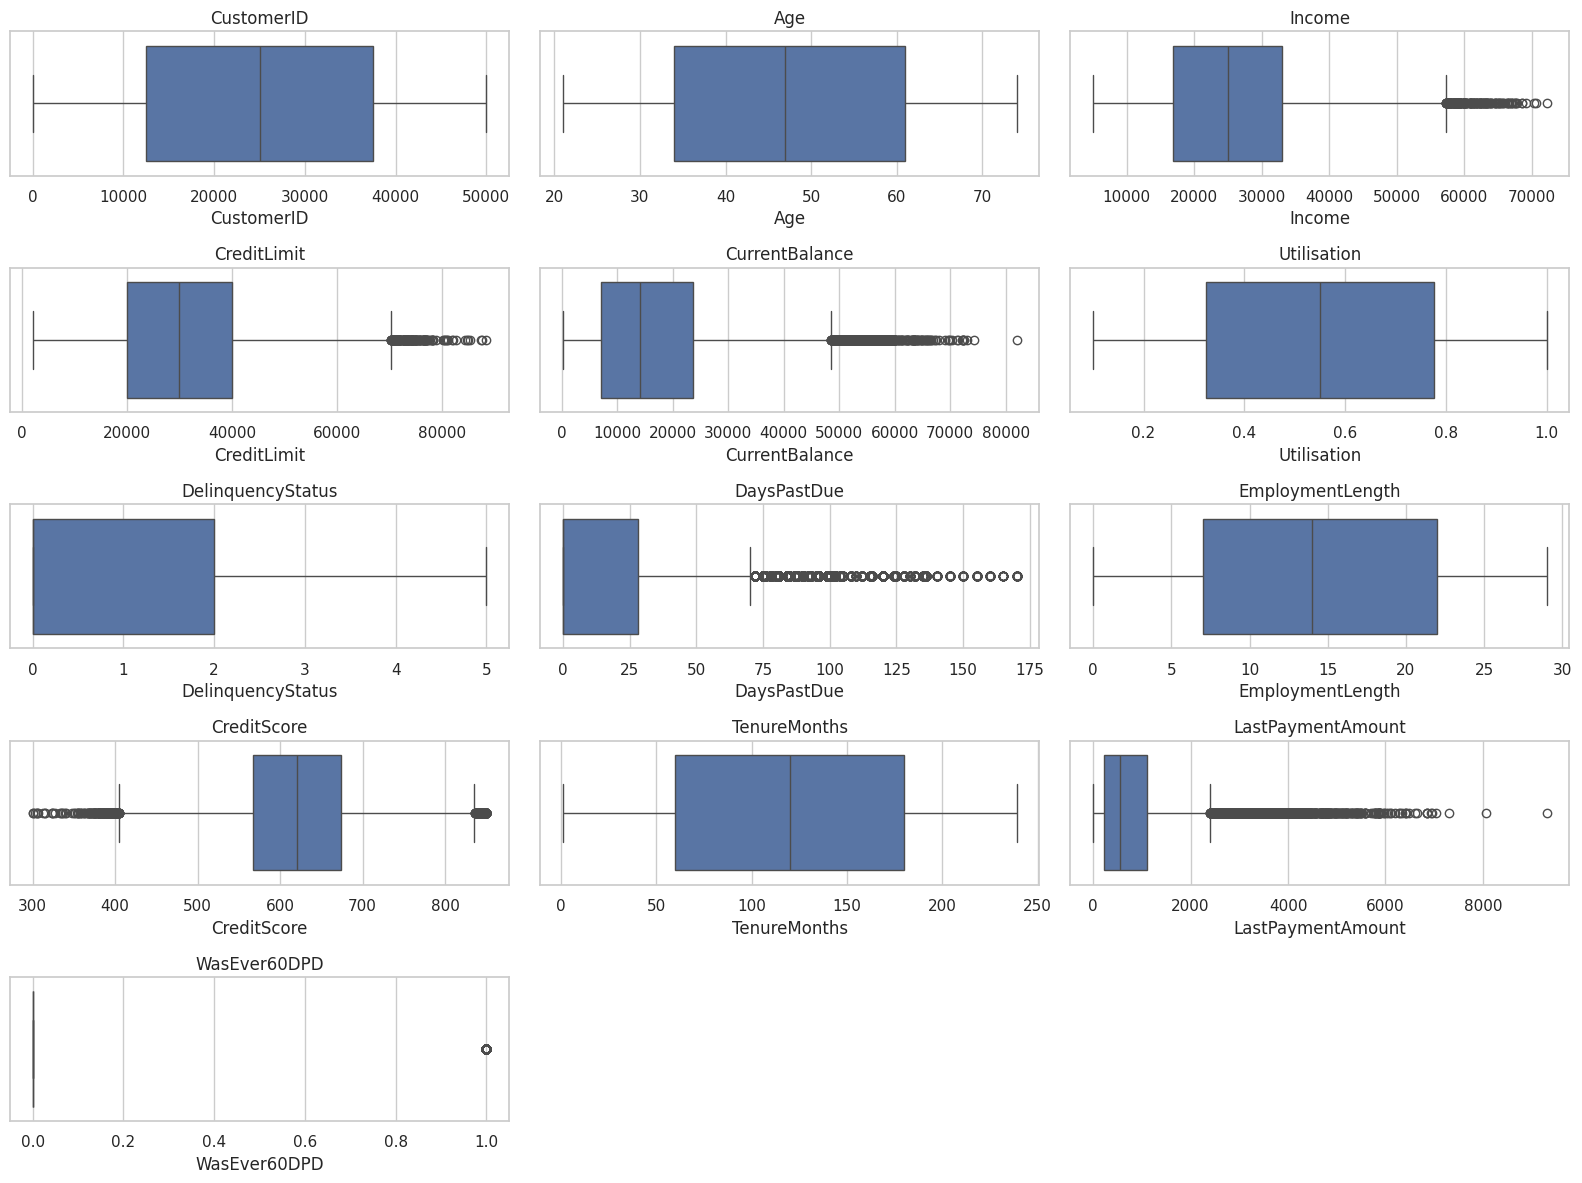

In [7]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()



## 🔗 Correlation Analysis

This includes:
- Feature-to-feature correlations  
- Relationship of each feature with the **target variable: `default`**  


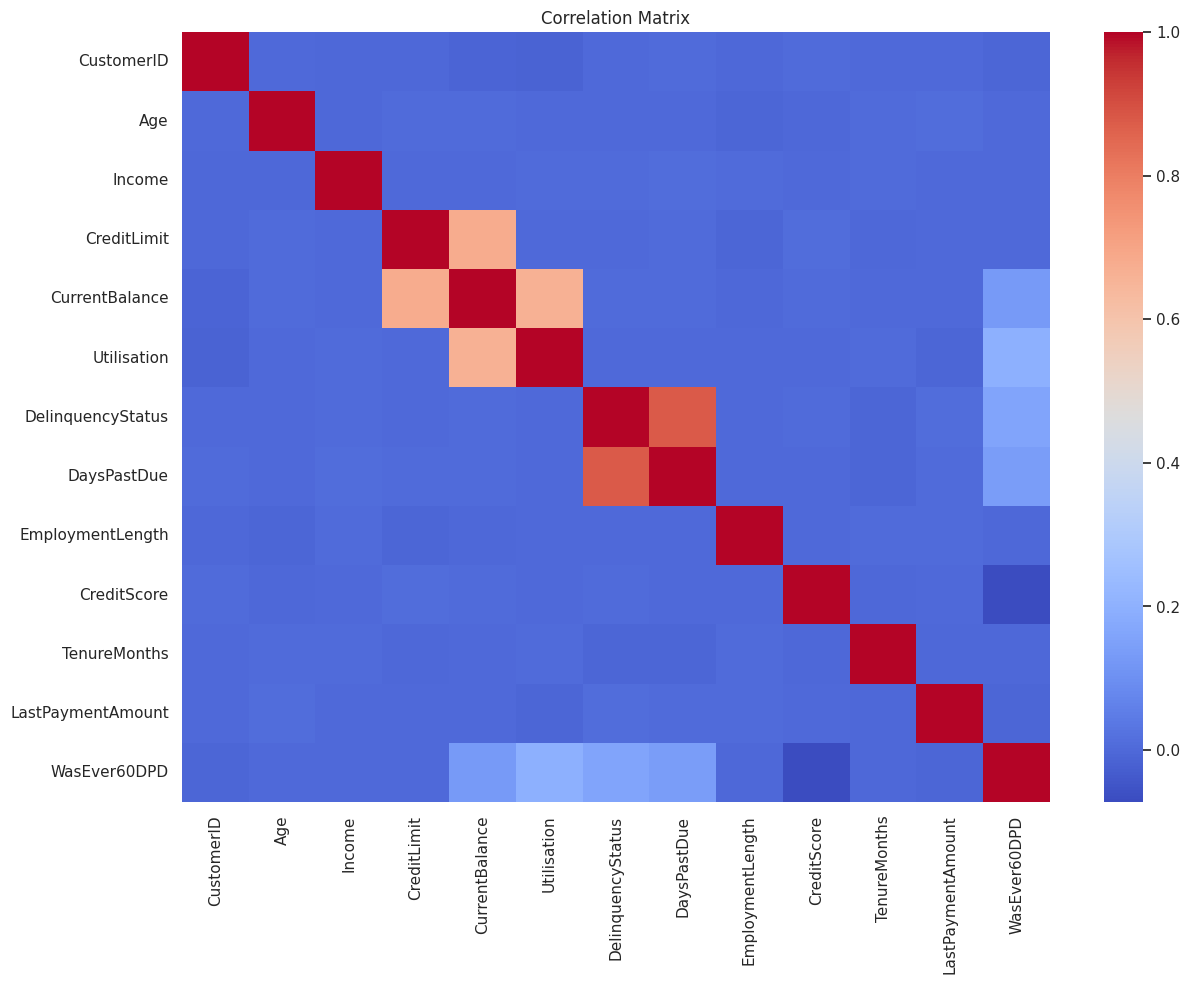

In [8]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()



In [9]:
if 'default' in df.columns:
    df[num_cols].corr()['default'].sort_values(ascending=False)
else:
    print("Target variable 'default' not found.")



Target variable 'default' not found.


# 🧠 Week 1 Findings & Insights

### 🔍 Data Quality
- Missing values: (data has no missing values)
- Duplicates: (No duplicates)
- Outlier-heavy fields: (income, credit limit, current balance, days past due, Last payment amount and credit score)

### 📈 Key Distributions
- Skewed variables:  
- Well-balanced variables:  

### 🔗 Correlations & Credit Risk Signals
- Top positive correlates of default: defaults not cotained in data
- Top negative correlates:
- Early hypotheses:

---

# 🟢 Next Steps (Week 2)
- Handle missing values  
- Encode categorical variables  
- Scale numeric variables  
- Feature selection  
- Train baseline models (Logistic, Tree-based)  
- Start integrating with GitHub project structure  


# Key Insights

- (Fill in after you analyze)
